In [2]:
#written by Francis Osei Tutu Afrifa, 2022.

from warnings import filterwarnings

filterwarnings('ignore')

First Let's import our packages:

In [3]:
%%time
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
cwd = os.getcwd()
### print the current working directory ###
print(cwd)

/pfs/tc1/home/fafrifa
CPU times: user 571 ms, sys: 61.3 ms, total: 633 ms
Wall time: 941 ms


<b/> Let's create a 1-D array of temperatures, 1-D array of pressures and a 2-D array of Potential temperature having the shape of the temperature and pressure arrays </b>

In [4]:
#temp_array with 0.1C resolution
temp_array = (np.arange(-30,30.01,0.1))

#pressure_array with 1 mb resolution
pressure_array = np.arange(1000,199,-1)

#potential temperature array filled with zeros
theta_array = np.zeros((len(pressure_array),len(temp_array)))

<b/> Before calculating the potential temperatures, let's read a phycon file containing a dictionary of some common physical constants and exctract the constants we need from the phycon_file: </b>

In [5]:
%%time
### Read the phycon dictionary file using scipy and assign it to the variable phycon_file
phycon_file = io.readsav('phycon.sav')

rd = phycon_file['rd']  ### Rd (specific gas constant for dry air) ###
cpd = phycon_file['cpd']   ### g (acceleration due to gravity) ###
tk0 = phycon_file['tko']  ### Tko (conversion between Kelvin and Celsius)
p0 = phycon_file['po']   ### Surface Pressure

CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 2.05 ms


<b/> Here's a function to do the calculation: </b>

In [6]:
def theta_funct(T,p):
    T = T+tk0
    p = p*1e2
    theta = T*((p0/p)**(rd/cpd))
    return theta

<b/> We can then call the function to do the calculations and fill the 2D array above (theta_array) with theta (potential temperature) values  </b>:

In [7]:
for i in range(0,len(temp_array)):
    for j in range(0,len(pressure_array)):
        theta = theta_funct(temp_array[i],pressure_array[j])
        theta_array[j,i] = theta

<b/> Finally here's a plot of the emagram: </b>

In [9]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

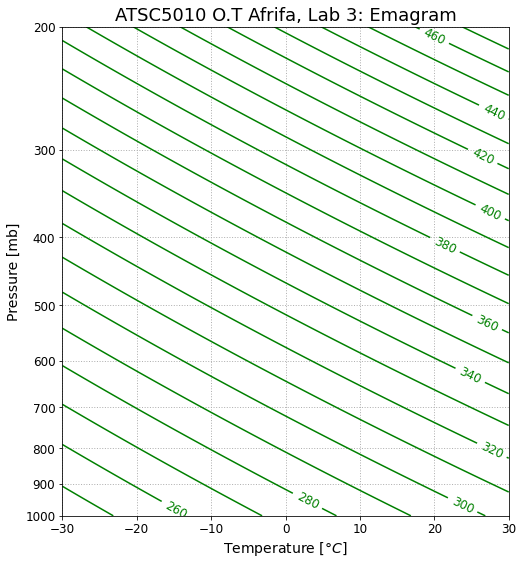

In [39]:
parameters = {'axes.labelsize': 14, 'xtick.labelsize':12, 'ytick.labelsize':12,'axes.titlesize': 18, 'grid.linewidth':1,'grid.linestyle': ':'}
plt.rcParams.update(parameters)

levels = np.arange(250,480,10)
Fig, axes = plt.subplots(figsize=(8,9)) ## 800 pixels wide by 900 pixels high ##
ax = axes.contour(temp_array,pressure_array, theta_array,levels=levels, colors = 'green')
axes.set(xlabel = 'Temperature [$\u00b0C$]',yscale='log', ylabel = 'Pressure [mb]', ylim=(1000,200),
         yticks=np.linspace(1000,200,9, dtype=int),yticklabels=np.linspace(1000,200,9, dtype=int),
        title = 'ATSC5010 O.T Afrifa, Lab 3: Emagram')  ### Did this with the idea from Nathaniel

axes.grid(visible=True)
axes.clabel(ax, levels[1::2],fontsize=12)
plt.savefig('./%s.jpg' %('afrifa_lab3_emagram_raw'),dpi=100)

***
<h2> Answers to Questions </h2>

***

1. If a parcel of air is at 0 C and 700 mb, what is its potential temperature?? 

> `Ans: Potential temperature,`$\theta =$ `303 K` 



2. Allow the parcel in (1) to undergo isothermal compression to 900 mb. What is its new temperature, pressure and potential temperature? Indicate this change on your emagram. 

> `For isothermal compression, dT = 0. Hence:`

>$Temp_{new} =0 °C = 273.15 K,$ &nbsp; $pressure_{new} =900 mb$ &nbsp; `and` &nbsp; $\theta _{new} = 282 K$


3. Has the parcel (in 2) been heated (or cooled) in the process? If the heat energy has changed, where did it go/come from?

>`The parcel is cooled in the process. i.e., considering change in enthalpy dh = 0 due to constant temperature (dT = 0):`

>$dq = -vdp$ &nbsp; `Hence, the change in heat energy is from the work done by compressing the parcel from 700mb to 900mb.`


4. What is the change in enthalpy (enthalpic energy) of the parcel in (2) during the process?

>`change in enthalpy,` $dh = cpdT = 0$


5. Start with a parcel at 10 C and 500 mb. What is the potential temperature?

>`Ans: Potential temperature,`$\theta =$ `345 K` 

6. Allow the parcel in (5) to undergo isobaric cooling to -20 C. What is its new temperature, pressure and potential temperature? Indicate this change on your emagram.

> `For isobaric cooling, dp = 0. Hence:`

>$Temp_{new} =-20 °C = 253.15 K,$ &nbsp; $pressure_{new} =500 mb$ &nbsp; `and` &nbsp; $\theta _{new} = 308 K$

7. Has the heat energy changed during this process? If so where did it come from/go?

>`Heat energy has changed during this process and this change comes from the change in internal energy which is a result of the change in temperature. i.e.:`
> $du = cvdT = dq$


8. What is the change in enthalpy (enthalpic energy) of the parcel for this process?

> $dh = cpdT = (1005.2 Jkg^{-1}K^{-1}) \times (-30 K) = -30,156 Jkg^{-1}$
$\therefore dh\approx -30.2kJkg^{-1}$


9. Now, start with a parcel at 0 C and 800 mb, What is its potential temperature?

>`Ans: Potential temperature,`$\theta =$ `291 K` 


10. Allow the parcel to undergo adiabatic expansion to 700 mb. Indicate this change on your emagram. What is the parcel’s new temperature, pressure and potential temperature?

> `For adiabatic expansion, dq = 0. Hence:`
>$Temp_{new} =-10 °C = 263.15 K,$ &nbsp; $pressure_{new} =700 mb$ &nbsp; `and` &nbsp; $\theta _{new} = 291 K$


11. Has the parcel been heated (or cooled) during this process?

> `The parcel has cooled adiabatically during this process.`


12. Let the same parcel in (9) undergo adiabatic compression to 1000 mb. What is the new temperature, pressure, and potential temperature?

> `For adiabatic compression, dq = 0. Hence:`
>$Temp_{new} \approx 18 °C = 291.15 K,$ &nbsp; $pressure_{new} =1000 mb$ &nbsp; `and` &nbsp; $\theta _{new} = 291 K$

13. Consider the parcel in (12) – assume that it contained some amount of moisture—will the temperature, after adiabatic compression to 1000 mb be more, less, or the same? Explain.

> The temperature of the moist parcel after adiabatic compression will be more compared to that of the dry parcel. This is because moist adiabatic lapse rate is less than dry adiabatic lapse rate.  As water vapor in the moist parcel condenses into liquid water , latent heat is released into the parcel, mitigating the adiabatic cooling.

<b/> And then the emagram with plots overlaid: </b>

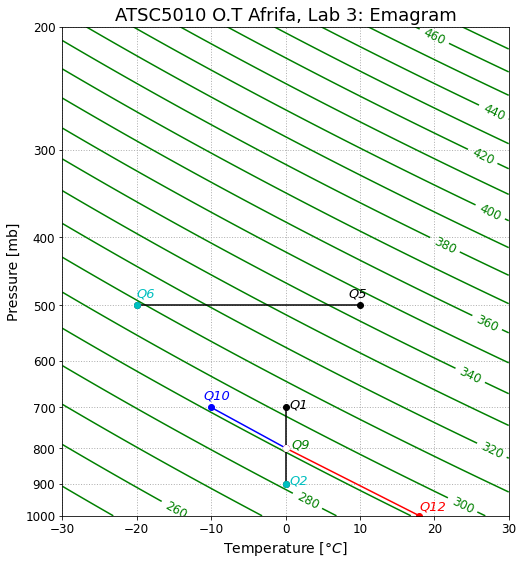

In [37]:
parameters = {'axes.labelsize': 14, 'xtick.labelsize':12, 'ytick.labelsize':12,'axes.titlesize': 18, 'grid.linewidth':1,'grid.linestyle': ':'}
plt.rcParams.update(parameters)

levels = np.arange(250,480,10)
Fig, axes = plt.subplots(figsize=(8,9))
#ax = axes.flatten()
ax = axes.contour(temp_array,pressure_array, theta_array,levels=levels, colors = 'green')
axes.set(xlabel = 'Temperature [$\u00b0C$]',yscale='log', ylabel = 'Pressure [mb]', ylim=(1000,200),xlim=(-30, 30),
         yticks=np.linspace(1000,200,9, dtype=int),yticklabels=np.linspace(1000,200,9, dtype=int),
        title = 'ATSC5010 O.T Afrifa, Lab 3: Emagram')
axes.grid(visible=True)
axes.clabel(ax, levels[1::2],fontsize=12)


###   Questions 1 and 2 ####
# =========================================================================== #
axes.plot([0,0],[700,900],  '-ko') 
axes.text(0.5,700, 'Q1', style='italic', fontsize=13); axes.text(0.5,900, 'Q2', style='italic', fontsize=13, color='c');
axes.plot(0,900, 'co')

###    Questions 5 and 6  ###
# =========================================================================== #
axes.plot([10,-20],[500,500], '-ko', label = 'Q6') ###ind
axes.text(8.5, 487, 'Q5', style='italic', fontsize=13); axes.text(-20,487, 'Q6', style='italic', fontsize=13, color='c')
axes.plot(-20,500, 'co')

###    Questions 9 and 10  ###
# =========================================================================== #
axes.plot([0,-10],[800,700],  '-bo')
axes.text(0.8, 800, 'Q9', style='italic', fontsize=13, color='g'); axes.text(-11,680, 'Q10', style='italic', fontsize=13, color='b')


###    Question 12  ###
# =========================================================================== #
axes.plot([0,18],[800,1000], '-ro')
axes.text(18,980, 'Q12', style='italic', fontsize=13, color='r')
axes.plot(0,800, 'wo')
plt.savefig('./%s.jpg' %('afrifa_lab3_emagram_w-plots'),dpi=100)